# Importing Libraries

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [6]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [7]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [9]:
start_date=datetime.datetime(2023,12,1)
enddate=datetime.datetime.today()

In [10]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [11]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [12]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [13]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [14]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [15]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [16]:
holding=Binance.get_inventory()

In [17]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,4576.206358,0.9999,-131.886217,2391.27,2259.383783
OMUSDT,526.319895,2709.077117,0.5920,0.000000,2182.76,2182.760000
BTCUSDT,601.021649,873.802903,0.1909,3.537078,272.78,276.317078
SOLUSDT,281.200518,370.621722,0.0810,0.000000,89.42,89.420000
JASMYUSDT,387.458505,302.040412,0.0660,0.000000,-85.42,-85.420000
ETHUSDT,250.747339,189.669585,0.0414,0.000000,-61.08,-61.080000
TRXUSDT,76.868953,109.066762,0.0238,-10.723889,32.20,21.476111
BBUSDT,60.176053,20.954195,0.0046,-39.733101,-39.22,-78.953101
BNBUSDT,1.142121,0.973660,0.0002,-10.606040,-0.17,-10.776040
PEPEUSDT,0.000004,0.000002,0.0000,-38.521986,-0.00,-38.521986


In [18]:
days=(enddate-start_date).days
remaining=days%500
numbers_of_table=days//500
remaining

431

In [19]:
# data1=Binance.get_price(tickers,start_date)
# data2=Binance.get_price(tickers,enddate)
# data=data1.combine_first(data2)
# data.index=pd.to_datetime(data.index)
# #data=data.dropna(axis=1)
# n=len(data.columns)
# data=data.sort_index()

In [20]:
temp_end=start_date
prices=pd.DataFrame()
for i in range(numbers_of_table+1):
    temp_data=Binance.get_price(tickers,temp_end)
    temp_end=temp_end+datetime.timedelta(500)
    prices=prices.combine_first(temp_data)
    
temp_end=temp_end+datetime.timedelta(500)
last_data=Binance.get_price(tickers,temp_end)
data=prices.combine_first(last_data)
data=data.sort_index()
data = data[~data.index.duplicated(keep='first')]

In [21]:
data.index=pd.to_datetime(data.index)
n=len(data.columns)
data=data.sort_index()

In [22]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [23]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [24]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [26]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [27]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [28]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])
price_pnl.index=pd.to_datetime(price_pnl.index)

In [29]:
# pnl_history=pd.DataFrame()
# pnl_history.index=quantities.index
# pnl_history=pnl_history.sort_index()

# for col in quantities:
    
#     pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost.iloc[-1][col])

# pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [30]:
# pnl_history['Total']-pnl_history['Total'].shift(1)

In [31]:
# pnl_history['Total']


In [32]:
daily_book_cost=book_cost.resample("D").last().dropna().sort_index()

In [33]:
book_cost_history=pd.DataFrame()
book_cost_history.index=set(daily_book_cost.index.append(quantities.index))

book_cost_history=book_cost_history.sort_index()

for col in quantities:
    
    book_cost_history[col]=daily_book_cost[col]

book_cost_history=book_cost_history.ffill()
book_cost_history=book_cost_history.loc[quantities.index]

In [34]:
#realized_pnl_time=realized_pnl_time.resample("D").last().dropna().sort_index()

#pd.DataFrame(realized_pnl_time)

In [35]:
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()

for col in quantities:
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [36]:
pnl_history['Total']

2024-09-23    -374.733177
2024-09-24    -351.229838
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-01-30    2444.042843
2025-01-31    2280.510081
2025-02-01    2121.973187
2025-02-02    1872.990523
2025-02-03    2467.233102
Name: Total, Length: 134, dtype: float64

In [37]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24     23.503339
2024-09-25    -11.102127
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-01-30    587.320822
2025-01-31   -163.532763
2025-02-01   -158.536893
2025-02-02   -248.982664
2025-02-03    594.242579
Name: Total, Length: 134, dtype: float64

In [38]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [39]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [40]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [41]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\niroo\AppData\Local\Temp\ipykernel_195776\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [42]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [43]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [44]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

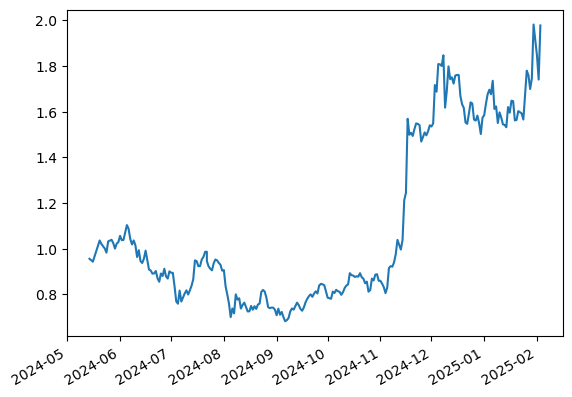

In [45]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [47]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [50]:
days=0
historical_risk=RiskAnalysis(returns_to_use.iloc[-days:])
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[-days:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [51]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [54]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.5171
XRPUSDT,0.1626
BNBUSDT,0.0855
SUIUSDT,0.0757
DEXEUSDT,0.0698
PEPEUSDT,0.0440
RAYUSDT,0.0380
AAVEUSDT,0.0072
BONKUSDT,0.0000
WLDUSDT,0.0000


In [55]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.462007
BTCUSDT,0.300000
XRPUSDT,0.104749
DEXEUSDT,0.055720
SUIUSDT,0.052767
RAYUSDT,0.021437
PEPEUSDT,0.003321


### Current results

In [57]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [58]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
OMUSDT,0.542606
BTCUSDT,0.366723
TRXUSDT,0.090670


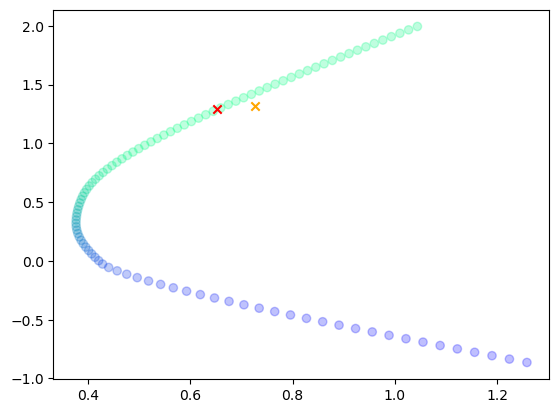

In [59]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [61]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison=current_holding_comparison.round(7)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2709.077117,0.591992,0.542606,0.049386
BTCUSDT,873.802903,0.190945,0.366723,-0.175778
SOLUSDT,370.621722,0.080989,0.000000,0.080989
JASMYUSDT,302.040412,0.066002,0.000000,0.066002
ETHUSDT,189.669585,0.041447,0.000000,0.041447
TRXUSDT,109.066762,0.023833,0.090670,-0.066837
BBUSDT,20.954195,0.004579,0.000000,0.004579
BNBUSDT,0.973660,0.000213,0.000000,0.000213
PEPEUSDT,0.000002,0.000000,0.000000,0.000000


In [62]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison=historical_comparison.fillna(0)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison=historical_comparison.round(7)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2709.077117,0.591992,0.462007,0.129985
BTCUSDT,873.802903,0.190945,0.300000,-0.109055
SOLUSDT,370.621722,0.080989,0.000000,0.080989
JASMYUSDT,302.040412,0.066002,0.000000,0.066002
ETHUSDT,189.669585,0.041447,0.000000,0.041447
TRXUSDT,109.066762,0.023833,0.000000,0.023833
BBUSDT,20.954195,0.004579,0.000000,0.004579
BNBUSDT,0.973660,0.000213,0.000000,0.000213
PEPEUSDT,0.000002,0.000000,0.003321,-0.003321
XRPUSDT,0.000000,0.000000,0.104749,-0.104749


# Risk Reward Analysis

In [64]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [65]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

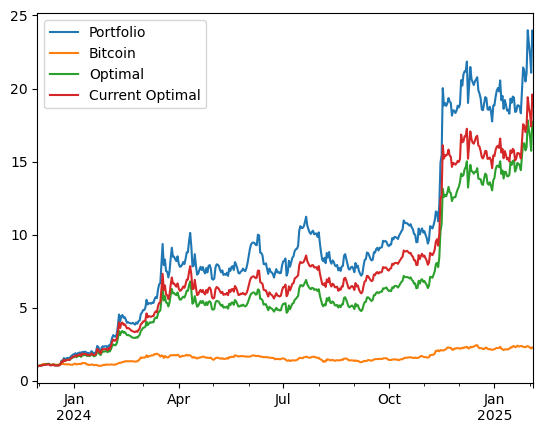

In [66]:
days=0
(1+portfolio_perf.iloc[-days:]).cumprod().plot()

In [67]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

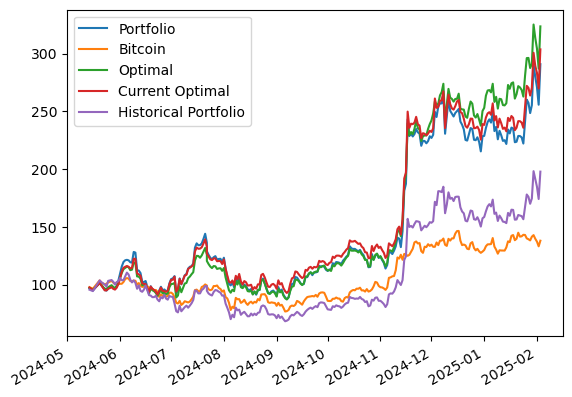

In [68]:
days=0
((1+current_perf.iloc[-days:]).cumprod()*100).plot()

In [69]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-25,241.503646,142.934147,280.773237,254.176341,167.492235
2025-01-26,260.099796,140.002047,296.077062,272.043647,177.981837
2025-01-27,257.306010,139.267274,296.211014,270.341898,175.966487
2025-01-28,248.451060,138.244001,287.486126,263.648349,169.963707
2025-01-29,255.379384,141.476921,291.232925,270.420440,174.562610
2025-01-30,290.969792,142.820328,325.129970,300.654691,198.187203
2025-01-31,279.960981,139.657879,313.476743,289.365139,191.324410
2025-02-01,270.892901,137.190295,304.274688,283.293754,184.686080
2025-02-02,255.706447,133.129604,286.990511,269.741817,174.094032
2025-02-03,290.801006,137.983551,323.513105,303.608098,197.785838


## Volatilities

In [71]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.699828
 dtype: float64,
 0.7006161203187676)

In [72]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.727017
 dtype: float64,
 0.7270173343699862)

In [73]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.832566
Bitcoin            0.427274
Optimal            0.700616
Current Optimal    0.752566
dtype: float64

In [74]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.471604824681753

In [75]:
days=90
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

3.3572480152070536

In [76]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.8167091481381095

## Risk Contribution

In [78]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BTCUSDT,0.371999,0.300000,0.019471,0.104197,0.033473,0.070724
DEXEUSDT,0.118829,0.055720,0.005058,0.030552,0.005474,0.025078
OMUSDT,32.634265,0.462007,0.958972,0.773366,0.672194,0.101173
PEPEUSDT,0.005255,0.003321,0.000248,0.002192,0.000035,0.002157
RAYUSDT,0.087395,0.021437,0.003153,0.017571,0.001273,0.016298
SUIUSDT,0.097283,0.052767,0.004348,0.028023,0.005160,0.022863
XRPUSDT,0.197212,0.104749,0.008749,0.044099,0.010237,0.033862


In [79]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.093881,0.542606,0.802638,0.840154,0.753677,0.086477
BTCUSDT,0.161618,0.366723,0.160845,0.121129,0.051498,0.069631
TRXUSDT,0.029279,0.090670,0.036517,0.038717,0.013165,0.025552


In [80]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.299769,0.595960,0.859468,0.826519,0.732466,0.094053
BTCUSDT,0.084580,0.191919,0.082067,0.056867,0.011363,0.045504
SOLUSDT,0.009132,0.080808,0.026695,0.042773,0.005517,0.037256
JASMYUSDT,-0.022426,0.070707,0.014330,0.053500,0.011813,0.041687
ETHUSDT,-0.008369,0.040404,0.009508,0.013897,0.000926,0.012971
TRXUSDT,0.006524,0.020202,0.007932,0.006444,0.000527,0.005918


# Value At Risk

## Historical

### Optimal Weights

In [84]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.053129940186813066, -0.07932904315348796)

### Current Weights

In [86]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.051489857287601956, -0.07605571861312788)

In [87]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [88]:
var=historical_var.iloc[row]
var

OMUSDT      -0.032173
BTCUSDT     -0.004268
SOLUSDT     -0.005809
JASMYUSDT   -0.007805
ETHUSDT     -0.001546
TRXUSDT     -0.000247
BBUSDT      -0.000000
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.051848
Name: 2024-10-25 00:00:00, dtype: float64

In [89]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.058380
BTCUSDT     -0.005071
SOLUSDT     -0.004344
JASMYUSDT   -0.005875
ETHUSDT     -0.001735
TRXUSDT     -0.000651
BBUSDT       0.000000
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.076056
dtype: float64

## Parametric

### Optimal Weights

In [92]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.0725950672806111, -0.09304680482926135)

### Current Weights

In [94]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.07533065650665689, -0.0965530738685201)

## Multivariate

### Optimal Weights

In [97]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06563125703814286, -0.08333202634923273)

### Current Weights

In [99]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.07106331991185307, -0.0893972444415776)

In [100]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.057456
BTCUSDT     -0.004507
SOLUSDT     -0.002896
JASMYUSDT   -0.003848
ETHUSDT     -0.001122
TRXUSDT     -0.000289
Portfolio   -0.070118
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [104]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.0647288967332078, -0.08311249110132499)

### Current Weights

In [106]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07013918955871629, -0.08929967431042424)

In [107]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.056778
BTCUSDT     -0.004323
SOLUSDT     -0.003202
JASMYUSDT   -0.004041
ETHUSDT     -0.001054
TRXUSDT     -0.000539
Portfolio   -0.069937
dtype: float64

## Student Copula

### Optimal Weights

In [110]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06601453834410213, -0.08588335236631398)

### Current Weights

In [112]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.0721658795646945, -0.0909947256584881)

In [113]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.060099
BTCUSDT     -0.003668
SOLUSDT     -0.003133
JASMYUSDT   -0.003224
ETHUSDT     -0.000931
TRXUSDT     -0.000462
Portfolio   -0.071518
dtype: float64

## Gumbel Copula

### Optimal Weights

In [116]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.12800535693495113, -0.18527117179976194)

### Current Weights

In [118]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.14293491316309773, -0.1999715005232524)

In [119]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.136674
BTCUSDT     -0.001412
SOLUSDT     -0.000338
JASMYUSDT   -0.001155
ETHUSDT      0.000192
TRXUSDT     -0.000192
Portfolio   -0.139581
dtype: float64

## Monte Carlo

### Optimal

In [122]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [123]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07547611680690797, -0.0943873532052192)

### Current Weights

In [125]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.0769768407303522, -0.0966323232406427)

In [126]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.063583
BTCUSDT     -0.004215
SOLUSDT     -0.003464
JASMYUSDT   -0.004067
ETHUSDT     -0.000985
TRXUSDT     -0.000615
Portfolio   -0.076929
dtype: float64

## VaR Violation

In [128]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.061625,-0.110229,-0.094235,-0.020947
2024-01-15,-0.061625,-0.110229,-0.096161,0.015597
2024-01-16,-0.061625,-0.110219,-0.093211,0.051672
2024-01-17,-0.061625,-0.112058,-0.095465,-0.029938
2024-01-18,-0.061625,-0.114632,-0.100832,-0.039981
...,...,...,...,...
2025-01-31,-0.055502,-0.085902,-0.078521,-0.035842
2025-02-01,-0.055502,-0.085969,-0.079997,-0.029355
2025-02-02,-0.057175,-0.089755,-0.087441,-0.056805
2025-02-03,-0.057175,-0.104110,-0.097150,0.127261


In [129]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.040820,-0.083888,-0.082130,-0.015732
2024-05-29,-0.040820,-0.081630,-0.077008,-0.007473
2024-05-30,-0.040820,-0.071369,-0.070630,0.029441
2024-05-31,-0.040820,-0.074306,-0.069771,0.044566
2024-06-01,-0.040820,-0.079473,-0.072538,0.060448
...,...,...,...,...
2025-01-31,-0.048859,-0.120632,-0.106108,-0.037835
2025-02-01,-0.048859,-0.123649,-0.110324,-0.032391
2025-02-02,-0.055304,-0.129832,-0.125423,-0.056061
2025-02-03,-0.053509,-0.145669,-0.125003,0.137246


<Axes: >

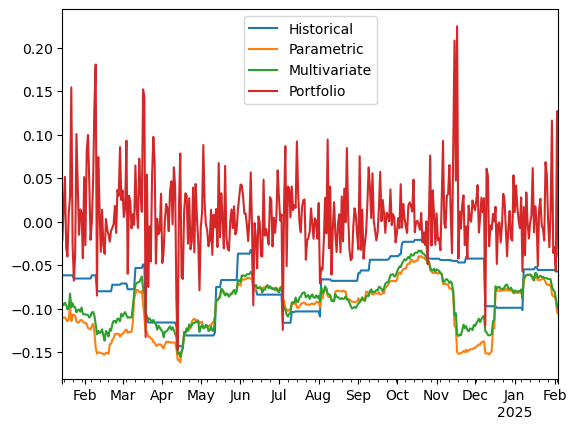

In [130]:
var_data.plot()

<Axes: >

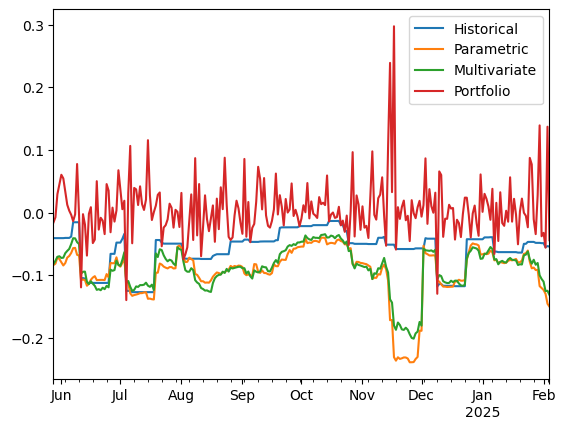

In [131]:
current_var_data.plot()

In [132]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.023196,0.010309,0.010309
Kupiec Stat,7.26584,18.8028,18.8028
P-value,0.007028,0.000014,0.000014


In [133]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.059289,0.01581,0.011858
Kupiec Stat,0.434842,8.396735,11.048092
P-value,0.509623,0.003759,0.000888


# Principal Component Analysis

## Historical PCA

In [136]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.78310759, 0.06840202, 0.05819264, 0.05013799, 0.04015976])

In [137]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT    0.016222
ADAUSDT     0.016151
ALGOUSDT    0.018524
APTUSDT     0.016809
ARBUSDT     0.017952
              ...   
WBTCUSDT    0.009200
WLDUSDT     0.022656
XLMUSDT     0.013366
XRPUSDT     0.011550
XTZUSDT     0.016668
Name: PC1, Length: 61, dtype: float64

<Axes: >

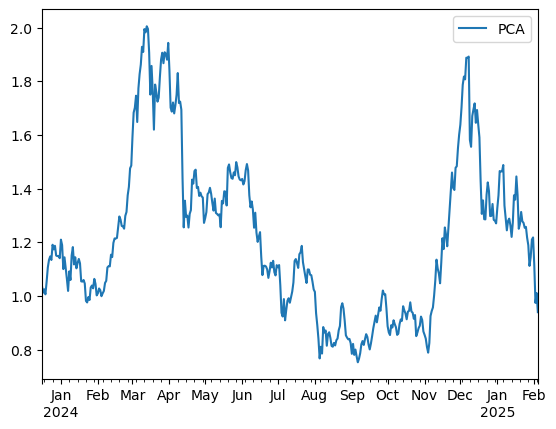

In [138]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

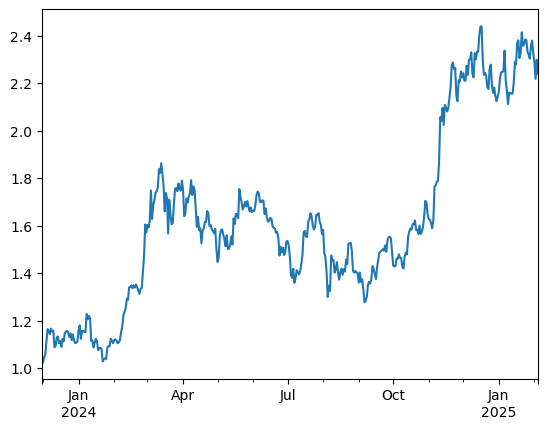

In [139]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [140]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
WBETHUSDT    0.439655
ETHUSDT      0.439967
ATOMUSDT     0.464910
DOTUSDT      0.466612
ETCUSDT      0.469185
NEXOUSDT     0.477323
ADAUSDT      0.506897
WBTCUSDT     0.524149
BTCUSDT      0.524723
AVAXUSDT     0.529807
EOSUSDT      0.531039
IOTAUSDT     0.555805
FILUSDT      0.563730
ARBUSDT      0.570569
GRTUSDT      0.580991
XTZUSDT      0.587337
LINKUSDT     0.597725
SOLUSDT      0.603317
IMXUSDT      0.608027
dtype: float64

<Axes: >

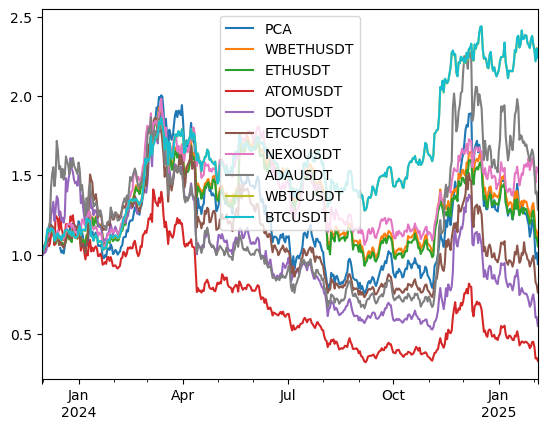

In [141]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

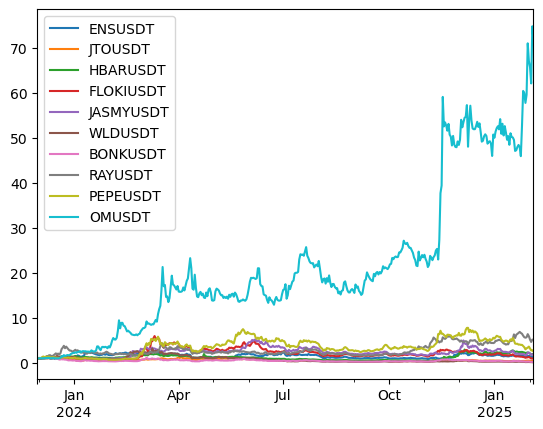

In [142]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [144]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.56890996, 0.14711432, 0.11855361, 0.09495171, 0.0704704 ])

In [145]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.095963
BTCUSDT      0.059062
SOLUSDT      0.097420
JASMYUSDT    0.176034
ETHUSDT      0.084394
TRXUSDT      0.055943
BBUSDT       0.206104
BNBUSDT      0.065565
PEPEUSDT     0.159513
Name: PC1, dtype: float64

<Axes: >

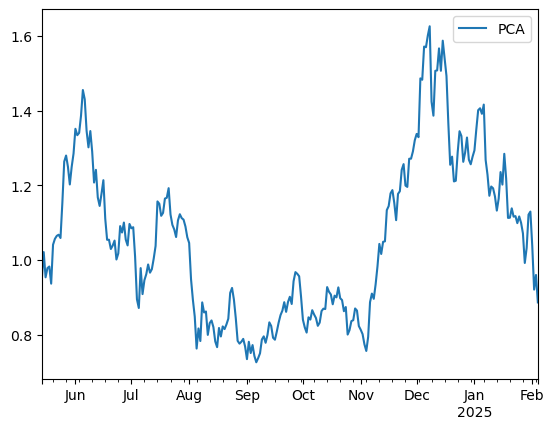

In [146]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

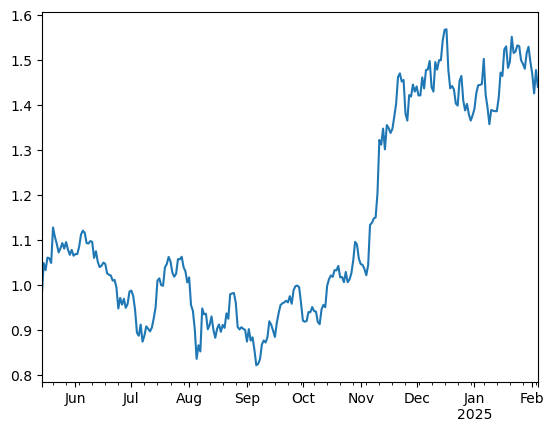

In [147]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [148]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
ETHUSDT      0.433599
BNBUSDT      0.466060
BTCUSDT      0.490415
SOLUSDT      0.491632
JASMYUSDT    0.691490
PEPEUSDT     0.743841
BBUSDT       0.775613
TRXUSDT      0.901535
OMUSDT       0.972946
dtype: float64

<Axes: >

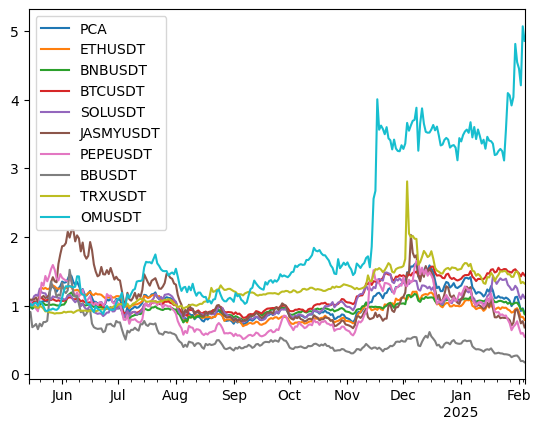

In [149]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [151]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.910291
BBUSDT       1.584747
JASMYUSDT    1.341677
SOLUSDT      1.165140
BTCUSDT      1.000000
ETHUSDT      0.973225
OMUSDT       0.894349
BNBUSDT      0.666702
TRXUSDT      0.327874
Name: BTCUSDT, dtype: float64

In [152]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.318944
PEPEUSDT     2.030846
BBUSDT       1.994042
SOLUSDT      1.384244
OMUSDT       1.164477
ETHUSDT      1.151449
TRXUSDT      1.023679
BTCUSDT      1.000000
BNBUSDT      0.729705
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [154]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [155]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
BTCUSDT,0.293961
BBUSDT,0.243247
TRXUSDT,0.204033
PEPEUSDT,0.162120
ETHUSDT,0.087811
SOLUSDT,0.069071
BNBUSDT,0.067031
JASMYUSDT,0.055667
OMUSDT,0.030805


### Regression to PCA

In [157]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-30:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

0.6975837929309793

In [158]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.308112
BNBUSDT      1.187569
ETHUSDT      1.031459
PCA          1.000000
SOLUSDT      0.760368
JASMYUSDT    0.439867
PEPEUSDT     0.419550
BBUSDT       0.386147
TRXUSDT      0.264072
OMUSDT       0.245848
dtype: float64

In [159]:
reg=ex_ante_perf.copy().dropna().iloc[-30:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BNBUSDT      1.757310
BTCUSDT      1.727454
ETHUSDT      1.259680
TRXUSDT      1.220388
PCA          1.000000
BBUSDT       0.720642
PEPEUSDT     0.670560
JASMYUSDT    0.535963
SOLUSDT      0.514309
OMUSDT       0.338778
dtype: float64

### Correlation Matrix

<Axes: >

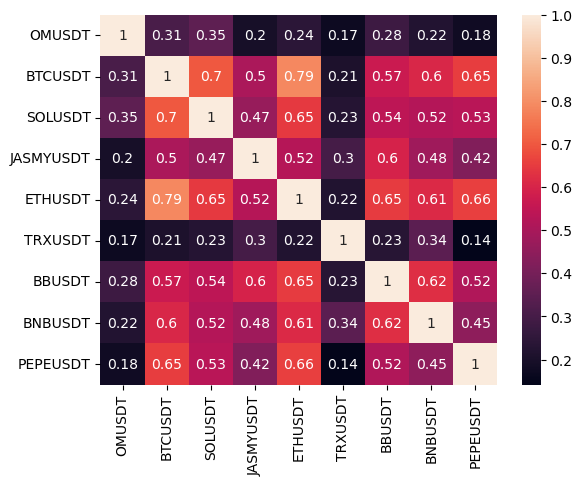

In [161]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

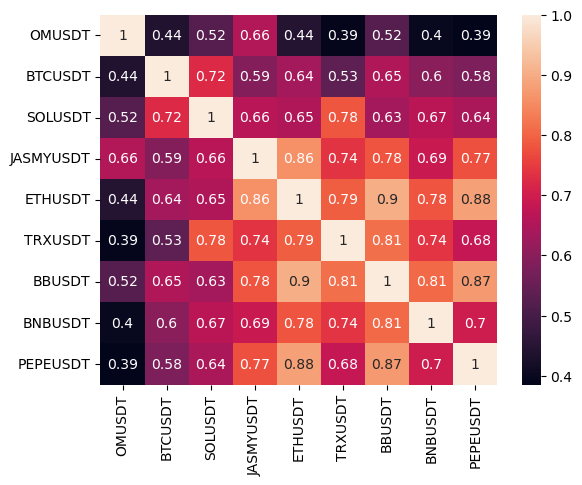

In [162]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [164]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,SOLUSDT,JASMYUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.000000,0.150852,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414562,0.112009,0.000000,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [165]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-06-29,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.961967,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-07-29,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.544875,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.145652,0.0
2024-08-28,0.928008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.071992,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-09-27,0.060666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-10-27,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.616773,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2024-11-26,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.124584,0.232829,0.0
2024-12-26,0.843853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2025-01-25,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.446224,0.0
2025-02-04,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [166]:
rolling_optimization.iloc[-1].sort_values(ascending=False)[:6]

OMUSDT      0.992454
AAVEUSDT    0.007546
LDOUSDT     0.000000
LTCUSDT     0.000000
MKRUSDT     0.000000
NEARUSDT    0.000000
Name: 2025-02-04 00:00:00, dtype: float64